In [1]:
using DrWatson
findproject(@__DIR__) |> quickactivate
using SpikingNeuralNetworks
using Logging
using Plots
global_logger(ConsoleLogger())
SNN.@load_units

0.001f0

In [2]:
param = SNN.IFParameter()
model = SNN.compose(neuron = SNN.IF(N=1; param))
SNN.monitor!(model.pop, [:v,:fire], sr=1kHz)

[ Info: ================
[ Info: Model: gKv6fKmAPz
[ Info: Time: 0.0 s
[ Info: ----------------
[ Info: Populations (1):
[ Info: IF        : IF        :  1          IFParamete
[ Info: ----------------
[ Info: Synapses (0): 
[ Info: ----------------
[ Info: Stimuli (0):
[ Info: ================


## Add current to neuron

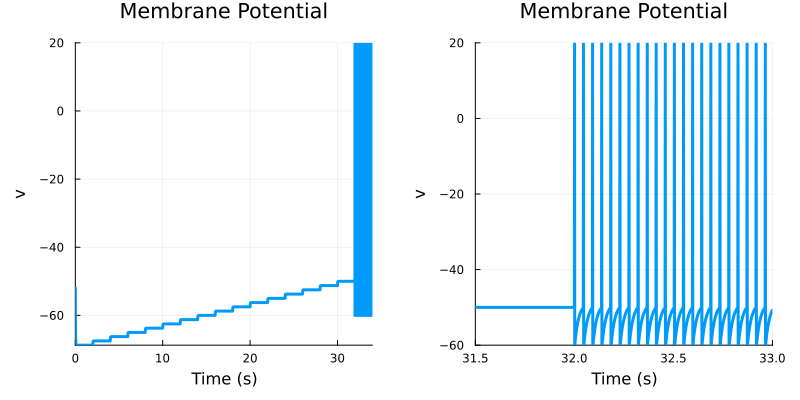

In [52]:
SNN.clear_records!(model)
SNN.reset_time!(model)
for x in 1:17
    model.pop.neuron.I .= 50*x*pF
    SNN.sim!(model, duration=2s);
end
p1 = SNN.vecplot(model.pop.neuron, :v, title="Membrane Potential", add_spikes=true)
p2 = SNN.vecplot(model.pop.neuron, :v, title="Membrane Potential", add_spikes=true, r=31.5s:1ms:33s)
plot(p1,p2, size=(800,400), xlabel="Time (s)", margin=5Plots.mm)
